The (binary) Hamming space $\{0, 1\}^n$ consists of all possible $n$-tuples of $0$s and $1$s. We define a code $C$ of length $n$ and size $r$ to be a subset $C$ of the Hamming space $\{0, 1\}^n$ with $r$ elements.

The Hamming distance between two elements $x = (x_i)$ and $y = (y_i)$ of $\{0, 1\}^n$ is the number of places in which $x$ and $y$ differ. The minimum distance of a code $C$ is the minimum Hamming distance $d(C)$ between distinct elements of $C$. The information rate of $C$ is $\frac{1}{n}\log_2{r}$. We define the error-control rate to be $\frac{d - 1}{n}$.

In [54]:
import random
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt

class Code:
    '''
    Represents a binary code in the Hamming space {0,1}^n.
    A code is defined as a subset of all possible n-tuples of 0s and 1s.
    Attributes:
        n: The length of the codewords.
        r: The size of the code (the number of codewords).
        codewords: A list of the binary strings forming the code.
    '''

    def __init__(self, n, r, codewords=None):
        '''
        Initializes a Code object.

        If codewords are not provided, a random code of size r and length n
        will be generated automatically.
        Args:
            n: The length of the codewords.
            r: The number of codewords in the code.
            codewords: A predefined list of codewords. Defaults to None.
        Raises:
            ValueError: If r > 2^n or if provided codewords are invalid.
        '''
        if not isinstance(n, int) or n <= 0:
            raise ValueError("n (length) must be a positive integer.")
        if not isinstance(r, int) or r < 0:
            raise ValueError("r (size) must be a non-negative integer.")

        self.n = n
        self.r = r

        max_possible_codewords = 2**n
        if r > max_possible_codewords:
            raise ValueError(
                f"Code size r ({r}) cannot be greater than the Hamming "
                f"space size 2^n ({max_possible_codewords})."
            )

        if codewords:
            if len(codewords) != r or len(set(codewords)) != r:
                raise ValueError("Number of provided codewords must match r and be unique.")
            for cw in codewords:
                if len(cw) != n or not all(c in '01' for c in cw):
                    raise ValueError(f"Codeword '{cw}' is invalid for n={n}.")
            self.codewords = sorted(list(set(codewords)))
        else:
            self.codewords = self._generate_random_code()

        # Cache for the minimum distance property
        self._min_distance = None

    def _generate_random_code(self):
        '''
        Generates a set of r unique random binary strings of length n.
        '''
        if self.r == 0:
            return []

        # This method efficiently samples r unique integers from the range
        # [0, 2^n - 1] and converts them to zero-padded binary strings.
        possible_codewords_as_int = range(2**self.n)
        random_sample_as_int = random.sample(possible_codewords_as_int, self.r)

        format_spec = f"0{self.n}b"
        return sorted([format(i, format_spec) for i in random_sample_as_int])

    @staticmethod
    def hamming_distance(word1, word2):
        '''
        Calculates the Hamming distance between two binary strings of equal length.
        '''
        if len(word1) != len(word2):
            raise ValueError("Codewords must have the same length to compare.")
        return sum(c1 != c2 for c1, c2 in zip(word1, word2))

    def calculate_minimum_distance(self):
        '''
        This procedure finds the minimum Hamming distance 'd' for the code.
        It computes the distance between every distinct pair of codewords and
        returns the minimum value found.
        Returns:
            The minimum distance 'd'. If the code has fewer than two
            elements, it returns n as there are no pairs to compare.
        '''
        if self.r < 2:
            return self.n

        min_d = self.n
        # Use itertools.combinations for an efficient way to get all unique pairs
        for word1, word2 in itertools.combinations(self.codewords, 2):
            dist = self.hamming_distance(word1, word2)
            if dist < min_d:
                min_d = dist
        return min_d

    @property
    def min_distance(self):
        '''
        A property to access the minimum distance 'd'.
        '''
        if self._min_distance is None:
            self._min_distance = self.calculate_minimum_distance()
        return self._min_distance

    @property
    def information_rate(self):
        '''
        Calculates the information rate: (1/n) * log2(r).
        '''
        if self.r == 0:
            return 0.0
        return (1 / self.n) * math.log2(self.r)

    @property
    def error_control_rate(self):
        '''
        Calculates the error-control rate: (d - 1) / n.
        '''
        return (self.min_distance - 1) / self.n

    def __str__(self):
        '''
        Provides a string representation of the Code.
        '''
        header = f"--- Code ---\nLength (n): {self.n}\nSize (r):   {self.r}\n"
        stats = (
            f"Min Distance (d):   {self.min_distance}\n"
            f"Information Rate:   {self.information_rate:.4f}\n"
            f"Error-Control Rate: {self.error_control_rate:.4f}\n"
        )
        # Avoid printing excessively long lists of codewords
        if self.r > 16:
            cw_list = f"Codewords: {self.codewords[:8]}... (and {self.r - 8} more)"
        else:
            cw_list = f"Codewords: {self.codewords}"
        return header + stats + cw_list

In [55]:
def find_best_random_code(n, r, num_trials=100):
    '''
    Generates multiple random codes to find one with the largest minimum distance.
    Args:
        n: The length of the codewords for the codes to be generated.
        r: The size of the codes to be generated.
        num_trials: The number of random codes to generate and test.
    Returns:
        The Code object with the highest minimum distance found during the trials.
    '''
    best_code = None
    best_d_found = -1

    print(f"\nSearching for best code (n={n}, r={r}) over {num_trials} trials...")
    for i in range(num_trials):
        random_code = Code(n=n, r=r)
        if random_code.min_distance > best_d_found:
            best_d_found = random_code.min_distance
            best_code = random_code
            print(f"  Trial {i+1: >4}: New best minimum distance found: d = {best_d_found}")

    print("Search complete.")
    return best_code


# This is the (7,4) Hamming code, which has a known minimum distance of 3
predefined_code = Code(n=7, r=8, codewords=[
    '0000000', '1110000', '1001100', '0111100',
    '0101010', '1011010', '1100110', '0010110'
])
print(predefined_code)

# Generate random codes and find the best 'd'
best_code_1 = find_best_random_code(n=8, r=16, num_trials=200)
print(best_code_1)

best_code_2 = find_best_random_code(n=10, r=12, num_trials=500)
print(best_code_2)

--- Code ---
Length (n): 7
Size (r):   8
Min Distance (d):   3
Information Rate:   0.4286
Error-Control Rate: 0.2857
Codewords: ['0000000', '0010110', '0101010', '0111100', '1001100', '1011010', '1100110', '1110000']

Searching for best code (n=8, r=16) over 200 trials...
  Trial    1: New best minimum distance found: d = 1
  Trial   99: New best minimum distance found: d = 2
Search complete.
--- Code ---
Length (n): 8
Size (r):   16
Min Distance (d):   2
Information Rate:   0.5000
Error-Control Rate: 0.1250
Codewords: ['00000100', '00010011', '00011010', '00101110', '00110010', '01000101', '01000110', '01101111', '10000000', '10000110', '10001100', '11000010', '11001111', '11010100', '11011101', '11111111']

Searching for best code (n=10, r=12) over 500 trials...
  Trial    1: New best minimum distance found: d = 1
  Trial    4: New best minimum distance found: d = 2
  Trial   26: New best minimum distance found: d = 3
Search complete.
--- Code ---
Length (n): 10
Size (r):   12
Min Di

In [56]:
def generate_code_with_min_distance(n, d):
    '''
    Generates a code using a greedy algorithm for a target minimum distance.
    This procedure starts with the all-zero vector.
    Args:
        n: The length of the codewords.
        d: The target minimum distance.
    Returns:
        Code: A newly constructed Code object.
    '''
    if d > n:
        print(f"Warning: A minimum distance of d={d} is not possible for length n={n}.")
        # Only the zero vector can be in the code.
        return Code(n=n, r=1, codewords=['0' * n])

    # Start with the all-zero vector.
    codewords = ['0' * n]

    # Create a list of all other possible vectors to check.
    candidates = [format(i, f'0{n}b') for i in range(1, 2**n)]

    # Randomly shuffle the candidates.
    random.shuffle(candidates)

    # Iterate through candidates and add them if they meet the distance criteria.
    for candidate in candidates:
        is_valid = True
        for existing_word in codewords:
            if Code.hamming_distance(candidate, existing_word) < d:
                is_valid = False
                break  # This candidate is too close to an existing codeword.
        if is_valid:
            codewords.append(candidate) # Add the new vector to the code.
    return Code(n=n, r=len(codewords), codewords=codewords)


def find_largest_r(n, d, num_trials=100):
    '''
    Runs the greedy generator multiple times to find the largest code size 'r'.
    Args:
        n: The length of the codewords.
        d: The target minimum distance.
        num_trials (int): The number of times to run the generator.
    Returns:
        The largest code found across all trials.
    '''
    best_code = None
    best_r_found = 0

    print(f"\nSearching for largest code (n={n}, d={d}) over {num_trials} trials...")
    # This loop is necessary because the random shuffling of candidates in the
    # generator can lead to different final code sizes.
    for i in range(num_trials):
        generated_code = generate_code_with_min_distance(n, d)
        if generated_code.r > best_r_found:
            best_r_found = generated_code.r
            best_code = generated_code
            print(f"  Trial {i+1: >4}: New best size found: r = {best_r_found}")

    print("Search complete.")
    global d_param
    d_param = d
    return best_code


# For (n=7, d=3), we are looking for the Hamming code, which has a size of r=16.
best_code_1 = find_largest_r(n=7, d=3, num_trials=50)
print("Best code found for n=7, d=3:")
print(best_code_1)

# For (n=8, d=4), this is the extended Golay code problem. The max size is 20.
best_code_2 = find_largest_r(n=8, d=4, num_trials=100)
print("Best code found for n=8, d=4:")
print(best_code_2)

# Run for a third set of parameters where 2^n is larger.
best_code_3 = find_largest_r(n=10, d=3, num_trials=20)
print("Best code found for n=10, d=3:")
print(best_code_3)


Searching for largest code (n=7, d=3) over 50 trials...
  Trial    1: New best size found: r = 10
  Trial    6: New best size found: r = 13
Search complete.
Best code found for n=7, d=3:
--- Code ---
Length (n): 7
Size (r):   13
Min Distance (d):   3
Information Rate:   0.5286
Error-Control Rate: 0.2857
Codewords: ['0000000', '0001011', '0010101', '0100111', '0101100', '0110010', '0111001', '1000110', '1011000', '1011111', '1100001', '1101010', '1110100']

Searching for largest code (n=8, d=4) over 100 trials...
  Trial    1: New best size found: r = 8
  Trial    6: New best size found: r = 9
  Trial    7: New best size found: r = 10
  Trial   29: New best size found: r = 11
  Trial   66: New best size found: r = 12
  Trial   79: New best size found: r = 16
Search complete.
Best code found for n=8, d=4:
--- Code ---
Length (n): 8
Size (r):   16
Min Distance (d):   4
Information Rate:   0.5000
Error-Control Rate: 0.3750
Codewords: ['00000000', '00001111', '00110101', '00111010', '01010

--- Running Experiments ---
Method 1 (fixed n, r -> find best d):
  Testing n=7, r=4...

Searching for best code (n=7, r=4) over 25 trials...
  Trial    1: New best minimum distance found: d = 2
  Trial    2: New best minimum distance found: d = 3
Search complete.
  Testing n=7, r=5...

Searching for best code (n=7, r=5) over 25 trials...
  Trial    1: New best minimum distance found: d = 2
Search complete.
  Testing n=7, r=8...

Searching for best code (n=7, r=8) over 25 trials...
  Trial    1: New best minimum distance found: d = 1
  Trial   12: New best minimum distance found: d = 2
Search complete.
  Testing n=7, r=13...

Searching for best code (n=7, r=13) over 25 trials...
  Trial    1: New best minimum distance found: d = 1
  Trial   19: New best minimum distance found: d = 2
Search complete.
  Testing n=7, r=19...

Searching for best code (n=7, r=19) over 25 trials...
  Trial    1: New best minimum distance found: d = 1
Search complete.
  Testing n=7, r=28...

Searching for bes

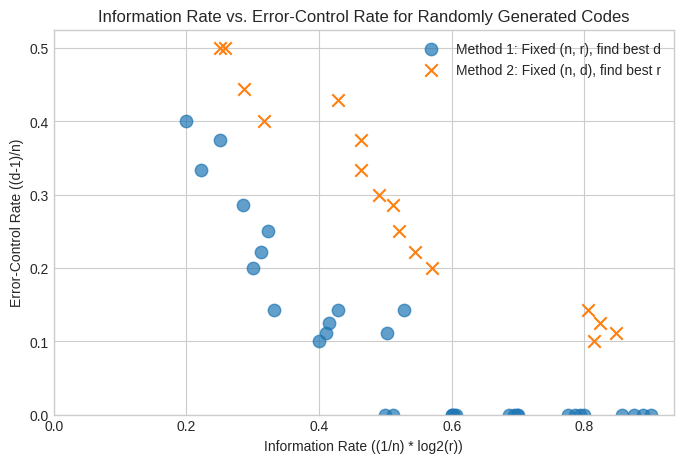

In [61]:
results_q1 = []
results_q2 = []
n_values = [7, 8, 9, 10]
num_trials_per_setting = 25

print("--- Running Experiments ---")
# For fixed 'n', vary 'r' and find the best 'd'
print("Method 1 (fixed n, r -> find best d):")
for n in n_values:
    # We vary 'r' across a range of possible sizes
    exponents = np.linspace(2, n - 1, num=8)
    r_steps = sorted(list(set(int(2**exp) for exp in exponents)))
    for r in r_steps:
        if r > 2**n: continue
        print(f"  Testing n={n}, r={r}...")
        best_code = find_best_random_code(n, r, num_trials_per_setting)
        if best_code:
            results_q1.append({
                "n": n, "r": r, "d": best_code.min_distance,
                "info_rate": best_code.information_rate,
                "error_rate": best_code.error_control_rate
            })

# For fixed 'n', vary 'd' and find the best 'r'
print("\nMethod 2 (fixed n, d -> find best r):")
for n in n_values:
    # We vary 'd' from a small value up to n/2
    d_steps = range(2, int(n / 2) + 2)
    for d in d_steps:
        print(f"  Testing n={n}, d={d}...")
        best_code = find_largest_r(n, d, num_trials_per_setting)
        if best_code:
            results_q2.append({
                "n": n, "r": best_code.r, "d": d, # Note: min_distance can be > d
                "info_rate": best_code.information_rate,
                "error_rate": best_code.error_control_rate
            })

fig, ax = plt.subplots(figsize=(8, 5))
if results_q1:
    q1_info_rates = [res['info_rate'] for res in results_q1]
    q1_error_rates = [res['error_rate'] for res in results_q1]
    ax.scatter(q1_info_rates, q1_error_rates,
                alpha=0.7, s=80, label='Method 1: Fixed (n, r), find best d')
if results_q2:
    q2_info_rates = [res['info_rate'] for res in results_q2]
    q2_error_rates = [res['error_rate'] for res in results_q2]
    ax.scatter(q2_info_rates, q2_error_rates,
                marker='x', s=80, label='Method 2: Fixed (n, d), find best r')

ax.set_title('Information Rate vs. Error-Control Rate for Randomly Generated Codes')
ax.set_xlabel('Information Rate ((1/n) * log2(r))')
ax.set_ylabel('Error-Control Rate ((d-1)/n)')
ax.legend()
ax.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

There is a clear inverse relationship between the information rate and the error-control rate. Codes with a high information rate (meaning they can transmit a lot of data for their length $n$) consistently have a low error-control rate. Conversely, codes with a high error-control rate (meaning they have a large minimum distance $d$ and can correct more errors) have a low information rate. This is the trade-off in coding theory.

The points on the graph form a distinct cloud with a clear upper-right boundary. This boundary represents the optimal trade-off codes that can be generated with these random methods. This boundary is related to theoretical limits in coding theory, such as the Gilbert-Varshamov bound or the singleton bound, which define the maximum possible $r$ for a given $n$ and $d$.

Method 1, fix $r$ and find the best $d$, tends to produce a wide spread of points. It is good at exploring the space of high information rates but it often results in codes with a very low minimum distance, leading to many points clustered near the $x$-axis (zero error-control rate).

Method 2, fix $d$ and find the best $r$, is more effective at generating codes with strong error-control capabilities. However, because the greedy selection process is restrictive, it often results in smaller codes $r$, thus populating the left side of the graph (lower information rates).